In [14]:
import pandas as pd
import numpy  as np
import folium

import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [15]:
india_json_data = requests.get('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid19_india/india_statewise.json').json()

In [16]:
india_json_data

{'success': True,
 'data': {'source': 'covid19india.org',
  'lastRefreshed': '2020-07-12T03:54:15.207Z',
  'total': {'confirmed': 850358,
   'recovered': 536231,
   'deaths': 22687,
   'active': 291058},
  'statewise': [{'state': 'Maharashtra',
    'confirmed': 246600,
    'recovered': 136985,
    'deaths': 10116,
    'active': 99202},
   {'state': 'Tamil Nadu',
    'confirmed': 134226,
    'recovered': 85915,
    'deaths': 1898,
    'active': 46413},
   {'state': 'Delhi',
    'confirmed': 110921,
    'recovered': 87692,
    'deaths': 3334,
    'active': 19895},
   {'state': 'Gujarat',
    'confirmed': 41027,
    'recovered': 28685,
    'deaths': 2033,
    'active': 10309},
   {'state': 'Uttar Pradesh',
    'confirmed': 35092,
    'recovered': 22689,
    'deaths': 913,
    'active': 11490},
   {'state': 'Karnataka',
    'confirmed': 36216,
    'recovered': 14718,
    'deaths': 615,
    'active': 20879},
   {'state': 'Telangana',
    'confirmed': 33402,
    'recovered': 20919,
    'deat

In [17]:
df_india=pd.io.json.json_normalize(india_json_data['data']['statewise'])

In [18]:
df_india

,state,confirmed,recovered,deaths,active
0,Maharashtra,246600,136985,10116,99202
1,Tamil Nadu,134226,85915,1898,46413
2,Delhi,110921,87692,3334,19895
3,Gujarat,41027,28685,2033,10309
4,Uttar Pradesh,35092,22689,913,11490
5,Karnataka,36216,14718,615,20879
6,Telangana,33402,20919,348,12135
7,West Bengal,28453,17959,906,9588
8,Andhra Pradesh,27235,14393,309,12533
9,Rajasthan,23748,17869,503,5376


In [19]:
df_india.set_index('state',inplace=True)

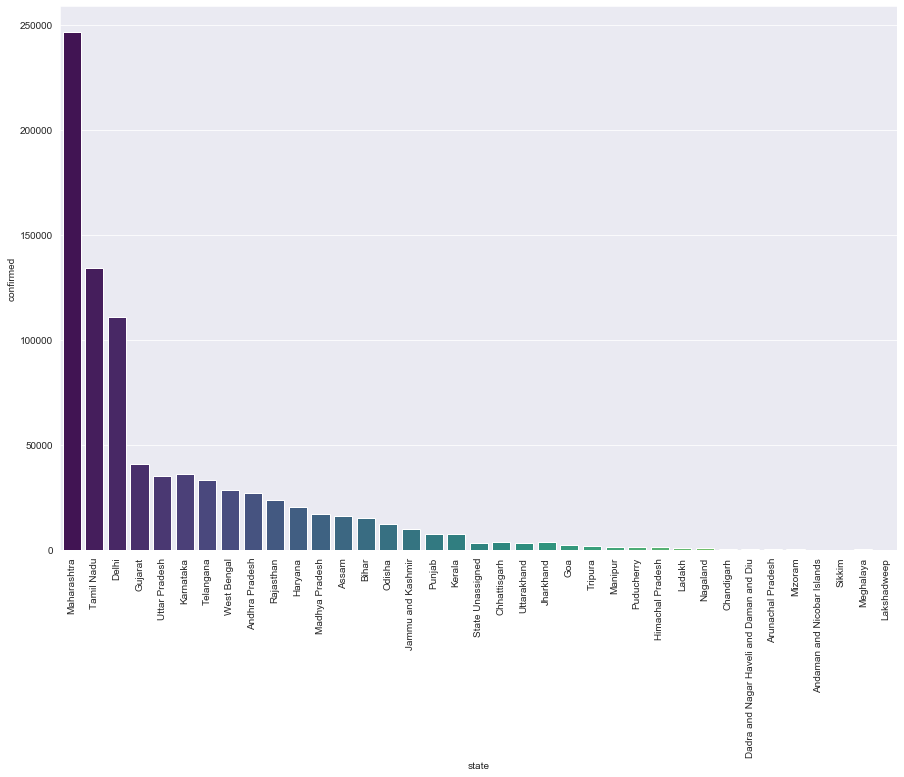

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x= df_india.index,y=df_india['confirmed'],palette='viridis')
plt.xticks(rotation=90)
plt.show()

# Bargraph using Plotly

In [21]:
import plotly.express as px
figure=px.bar(df_india,x=df_india.index,height=800,width=900,y='confirmed',color='confirmed')
figure.show()

In [22]:
location = {
    "Sikkim": [27.5330,88.5122],
    "Maharashtra" : [19.7515,75.7139],
    "West Bengal": [22.9868,87.8550],
    "Chandigarh":[30.7333,76.7794],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Gujarat":[22.2587,71.1924],
     "Odisha":[20.9517,85.0985],
    "Delhi" : [28.7041,77.1025],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Kerala" : [10.8505,76.2711],
    "Rajasthan": [27.0238,74.2179],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Tripura":[23.9408,91.9882],  
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],   
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Punjab":[31.1471,75.3412], 
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,20.4283] 
}

In [30]:
df_india["Lat"]= ''
df_india['Long']= ''

for index in df_india.index:
    
    df.india.loc[df_india.index==index, "Lat"]=location[index][0]
    df.india.loc[df_india.index==index, "Long"]=location[index][1]

NameError: name 'df' is not defined

In [25]:
df_india

,confirmed,recovered,deaths,active,Lat,Long
state,,,,,,
Maharashtra,246600,136985,10116,99202,,
Tamil Nadu,134226,85915,1898,46413,,
Delhi,110921,87692,3334,19895,,
Gujarat,41027,28685,2033,10309,,
Uttar Pradesh,35092,22689,913,11490,,
Karnataka,36216,14718,615,20879,,
Telangana,33402,20919,348,12135,,
West Bengal,28453,17959,906,9588,,
Andhra Pradesh,27235,14393,309,12533,,


In [ ]:
india_map = folium.Map(location= [10,80], zoom_start=4, max_zoom=8, height = 1000, width='100%', tiles = 'CartoDB dark_matter')
for i in range(0, len(df_india)):
    folium.Circle(location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
                  radius=(int(np.log2(df_india.iloc[i]['confirmed']+1.0001)))*12000,
                  tooltip= "<h5 style='text-align:center;font-weight: bold'>"+ df_india.iloc[i].name +"</h5>"+
                  "<li>Confirmed "+str(df_india.iloc[i]['confirmed'])+"</li>"+ "<li>Deaths "+str(df_india.iloc[i]['deaths'])+"</li>"+ "<li>Active "+str(df_india.iloc[i]['active'])+"</li>"+ "</ul>", fill=True).add_to(india_map), india_map 